# Aplicando SVM

Treine um classificador SVM com o dataset anexo.
Este dataset contém as transações feitas por uma operadora de cartão de créditos.
Existem 492 fraudes de um total de mais de 280 mil transações.

O atributo 'Amount' é o valor da transação.
As colunas V1, V2, V3 ... representam as componentes principais do dataset original.
O atributo a ser previsto está na coluna Class.
O valor 1 representa uma transação fraudulenta e o valor 0, uma transação legítima.

In [1]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm
import pandas as pd

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# procurando por valores nulos
n_null = data.isnull().sum().sum()
not_fraud, fraud = data.Class.value_counts()

print(f"valores nulos: {n_null}\nFraudes: {fraud}\nNão fraudes: {not_fraud}")
data.dtypes

valores nulos: 0
Fraudes: 492
Não fraudes: 284315


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [4]:
target = data.Class
features = data.drop("Class", axis=1)

# Dividindo os dados em treinamento e teste
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [5]:
for feature_to_scale in features_train:
    scaler = MinMaxScaler()
    features_train[feature_to_scale] = scaler.fit_transform(features_train[[feature_to_scale]])

# O resultado não foi bom
# # Aplicando PCA
# pca = PCA(n_components=0.99)
# features_train_pca = pca.fit_transform(features_train)
# components = features_train_pca.shape[1]
#
# features_train_pca

In [6]:
# Realizando o under sampling para balancear os dados

ros = RandomUnderSampler()
features_train_res, target_train_res = ros.fit_resample(features_train, target_train)

target_train_res.value_counts()

0    391
1    391
Name: Class, dtype: int64

In [7]:
svm_model = svm.SVC(random_state=0)
svm_model.fit(features_train_res, target_train_res);

In [8]:
# Normalizando os dados de teste

for feature_to_scale in features_test:
    scaler = MinMaxScaler()
    features_test[feature_to_scale] = scaler.fit_transform(features_test[[feature_to_scale]])

# # Aplicando PCA
# pca = PCA(n_components=components)
# features_test_pca = pca.fit_transform(features_test)

Accuracy: 0.9918
Precision: 0.1618
Recall: 0.8713
F1: 0.2729


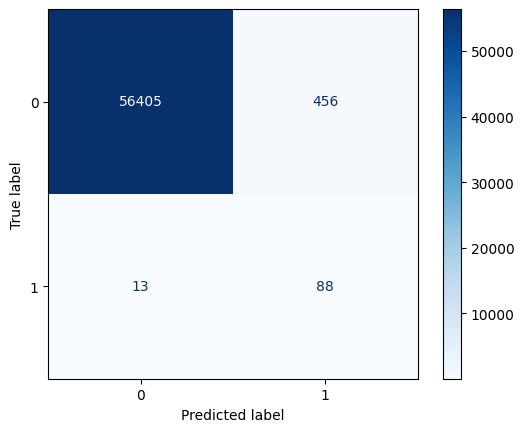

In [9]:
# Avaliando o modelo
def evaluate_classifier(model, features, target, pos_label=1):
    predictions = model.predict(features)
    accuracy = model.score(features, target)
    precision = precision_score(target, predictions, pos_label=pos_label)
    recall = recall_score(target, predictions, pos_label=pos_label)
    f1 = f1_score(target, predictions, pos_label=pos_label)
    conf_matrix = confusion_matrix(target, predictions)
    ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot(cmap='Blues')
    print(f'Accuracy: {accuracy:.4}\nPrecision: {precision:.4}\nRecall: {recall:.4}\nF1: {f1:.4}')


evaluate_classifier(svm_model, features_test, target_test)

In [10]:
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'degree': [1, 2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'decision_function_shape': ['ovo', 'ovr']
}

svm_cv = svm.SVC()
svm_grid = GridSearchCV(svm_cv, svm_params, cv=5, n_jobs=-1)

svm_grid.fit(features_train, target_train)

print(f'Best score: {svm_grid.best_score_:.4}')
svm_grid.best_params_

Best score: 0.9994


{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'poly',
 'shrinking': True}

In [11]:
pd.DataFrame(svm_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_function_shape,param_gamma,param_kernel,param_shrinking,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,663.440135,528.234927,0.723160,0.446920,ovo,scale,linear,True,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.999364,0.999386,0.999342,0.999429,0.999429,0.999390,0.000035,5
1,28.724244,2.521240,1.375512,0.242188,ovo,scale,linear,False,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.999364,0.999386,0.999342,0.999429,0.999429,0.999390,0.000035,5
2,111.481102,13.823147,0.962097,0.150886,ovo,scale,poly,True,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.999495,0.999473,0.999451,0.999342,0.999451,0.999443,0.000053,1
3,173.616485,10.993138,0.876758,0.333898,ovo,scale,poly,False,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.999495,0.999473,0.999451,0.999342,0.999451,0.999443,0.000053,1
4,23.791789,0.977101,2.311834,0.324551,ovo,scale,rbf,True,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.999364,0.999407,0.999342,0.999320,0.999429,0.999372,0.000041,13
5,24.134368,1.602386,2.054058,0.142529,ovo,scale,rbf,False,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.999364,0.999407,0.999342,0.999320,0.999429,0.999372,0.000041,13
6,24.525169,1.346916,3.464883,0.446183,ovo,scale,sigmoid,True,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.998288,0.998288,0.998288,0.998288,0.998266,0.998284,0.000009,29
7,20.730744,1.569004,3.219418,0.234899,ovo,scale,sigmoid,False,"{'decision_function_shape': 'ovo', 'gamma': 's...",0.998288,0.998288,0.998288,0.998288,0.998266,0.998284,0.000009,29
8,632.550684,508.477236,0.634330,0.351759,ovo,auto,linear,True,"{'decision_function_shape': 'ovo', 'gamma': 'a...",0.999364,0.999386,0.999342,0.999429,0.999429,0.999390,0.000035,5
9,20.882020,1.652359,1.016051,0.153411,ovo,auto,linear,False,"{'decision_function_shape': 'ovo', 'gamma': 'a...",0.999364,0.999386,0.999342,0.999429,0.999429,0.999390,0.000035,5


Accuracy: 0.9992
Precision: 0.7477
Recall: 0.8218
F1: 0.783


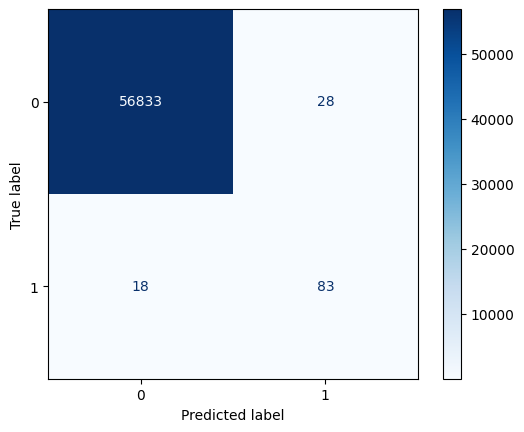

In [13]:
best_svm = svm.SVC(decision_function_shape='ovo', gamma='scale', kernel='poly', shrinking=True)
best_svm.fit(features_train, target_train)
evaluate_classifier(best_svm, features_test, target_test)